In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np
import seaborn as sns
# Path to the CSV file
crime_reports_path = "data/Crime_Reports_20240422.csv"

# Path manipulation to avoid directory issues
path = os.path.realpath(crime_reports_path)

# Reads the CSV file into a DataFrame
crime_report_df = pd.read_csv(crime_reports_path, low_memory=False)

# Print the column names of the DataFrame
print(list(crime_report_df))
def all_data_df(crime_reports_path):
    # Reads the csv file and makes it a DataFrame
    df = pd.read_csv(crime_reports_path, low_memory=False)
    return df

all_data_df = all_data_df(crime_reports_path)  # Call the function with the path
print(list(all_data_df))

# Create a new dataframe that just has crimes and dates
date_crime = pd.concat([all_data_df['Occurred Date'], all_data_df['Highest Offense Description']], axis=1) 

# print(date_crime.sort_values(by=['Highest Offense Description'])) # Uncomment this out to see every type of crime accounted for in our data frame.

crimes = date_crime['Highest Offense Description'].unique() # This populates a list containing the different types of crimes
#print(crimes) # Uncomment this out to view the different types of crimes accounted for in the data set.

filtered_Auto_theft_crime = date_crime[date_crime['Highest Offense Description'].str.contains('Auto theft', case=False)]      #| These two lines create two new lists containing all crimes that include

 # Converts each date in the 'Occurred Date' into a more usable format.
all_theft_crimes = pd.concat([filtered_Auto_theft_crime], ignore_index=True)

all_theft_crimes['Occurred Date'] = pd.to_datetime(all_theft_crimes['Occurred Date'], format='mixed')

all_theft_crimes['Season'] = pd.cut(                            #| Initialize binning     
    all_theft_crimes['Occurred Date'].dt.dayofyear,             #| Return a number for the date for easier binning
    bins= [0, 79, 171, 264, 355, 365],                          #| Range of seasons by days in each one
    labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'],    #| Labels for each season. Winter is repeated because it loops back around into new year.     
    ordered=False                                               #| We have duplicate labels, so this is required lest an error occur
    )

season_theft_crimes = all_theft_crimes.drop(columns=['Occurred Date']) # Creates another new dataframe that only includes the season and the crime.


['Incident Number', 'Highest Offense Description', 'Highest Offense Code', 'Family Violence', 'Occurred Date Time', 'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date', 'Report Time', 'Location Type', 'Address', 'Zip Code', 'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract', 'Clearance Status', 'Clearance Date', 'UCR Category', 'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude', 'Longitude', 'Location']
['Incident Number', 'Highest Offense Description', 'Highest Offense Code', 'Family Violence', 'Occurred Date Time', 'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date', 'Report Time', 'Location Type', 'Address', 'Zip Code', 'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract', 'Clearance Status', 'Clearance Date', 'UCR Category', 'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude', 'Longitude', 'Location']


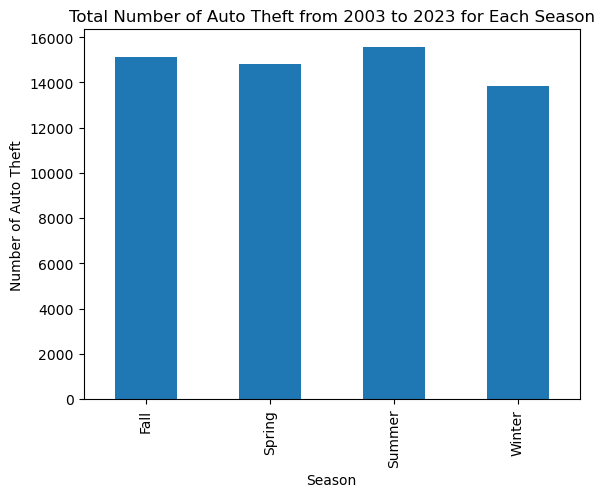

In [2]:
# Filter data for the years 2003 to 2023
filtered_years = all_theft_crimes[(all_theft_crimes['Occurred Date'].dt.year >= 2003) & (all_theft_crimes['Occurred Date'].dt.year <= 2023)]

# Group by season and count occurrences
season_counts = filtered_years.groupby('Season', observed=False).size()

# Plot the data as a bar plot
season_counts.plot(kind='bar')

# Add labels and title
plt.title('Total Number of Auto Theft from 2003 to 2023 for Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Auto Theft')

# Show the plot
plt.show()



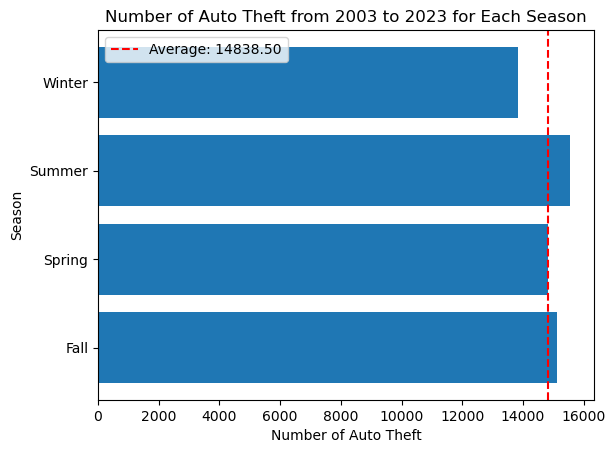

In [3]:
# Group by season and calculate the number of auto thefts per season
season_counts = filtered_years.groupby('Season', observed=False)['Occurred Date'].size()

# Calculate the average number of auto thefts per season
season_avg = season_counts.mean()

# Plot the data as a horizontal bar plot
plt.barh(season_counts.index, season_counts)

# Add a line for the average number of auto thefts
plt.axvline(x=season_avg, color='red', linestyle='--', label=f'Average: {season_avg:.2f}')

# Add labels and title
plt.title('Number of Auto Theft from 2003 to 2023 for Each Season')
plt.xlabel('Number of Auto Theft')
plt.ylabel('Season')
plt.legend()

# Show the plot
plt.show()



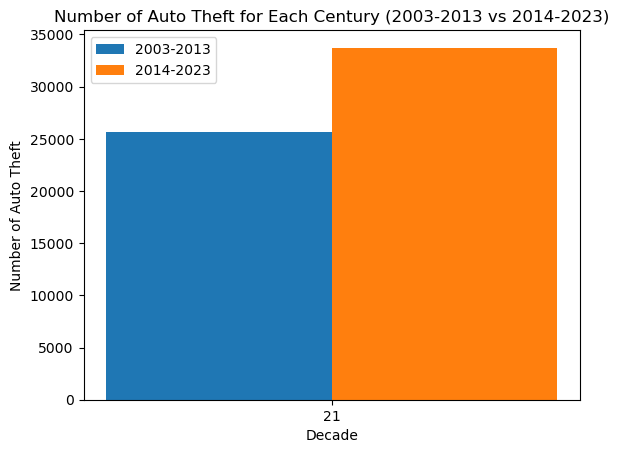

In [5]:
# Filter data for the years 2003 to 2013 and 2014 to 2023
filtered_years_2003_2013 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2003) & (filtered_years['Occurred Date'].dt.year <= 2013)].copy()
filtered_years_2014_2023 = filtered_years[(filtered_years['Occurred Date'].dt.year >= 2014) & (filtered_years['Occurred Date'].dt.year <= 2023)].copy()

# Extract century from the date for each time range
filtered_years_2003_2013.loc[:, 'Decade'] = (filtered_years_2003_2013['Occurred Date'].dt.year // 100) + 1
filtered_years_2014_2023.loc[:, 'Decade'] = (filtered_years_2014_2023['Occurred Date'].dt.year // 100) + 1

# Group by century and calculate the count of occurrences for each time range
century_counts_2003_2013 = filtered_years_2003_2013.groupby('Decade').size()
century_counts_2014_2023 = filtered_years_2014_2023.groupby('Decade').size()

# Plot the data as a bar plot
plt.bar(century_counts_2003_2013.index - 0.2, century_counts_2003_2013, width=0.4, label='2003-2013')
plt.bar(century_counts_2014_2023.index + 0.2, century_counts_2014_2023, width=0.4, label='2014-2023')

# Add labels and title
plt.title('Number of Auto Theft for Each Century (2003-2013 vs 2014-2023)')
plt.xlabel('Decade')
plt.ylabel('Number of Auto Theft')
plt.xticks(century_counts_2003_2013.index)

# Add legend
plt.legend()

# Show the plot
plt.show()


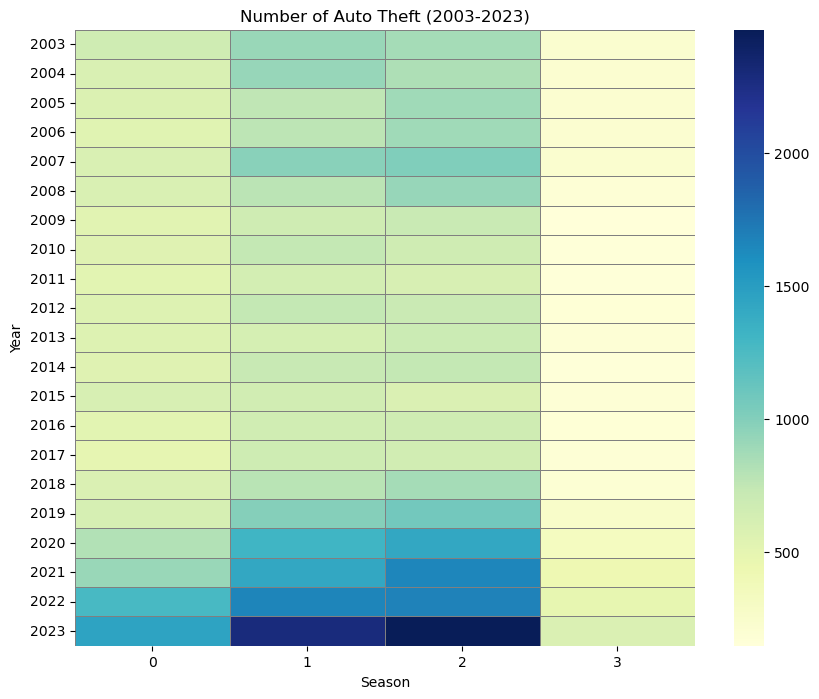

In [6]:


# Filter data for the years 2003 to 2023 and make a copy
filtered_years = all_theft_crimes[(all_theft_crimes['Occurred Date'].dt.year >= 2003) & (all_theft_crimes['Occurred Date'].dt.year <= 2023)].copy()

# Extract year and season from the date
filtered_years['Year'] = filtered_years['Occurred Date'].dt.year
filtered_years['Season'] = filtered_years['Occurred Date'].dt.month // 4 % 4  # Calculate the season (0: Winter, 1: Spring, 2: Summer, 3: Fall)

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_years.groupby(['Year', 'Season']).size().unstack(fill_value=0), cmap='YlGnBu', linewidths=0.5, linecolor='gray')

# Add labels and title
plt.title('Number of Auto Theft (2003-2023)')
plt.xlabel('Season')
plt.ylabel('Year')

# Show the plot
plt.show()
